In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
plt.style.use(["default",'seaborn-v0_8-poster','normal_font.mplstyle'])

In [41]:
fs_bulk_odd_pi1 = np.load('pi1.npy')
fs_bulk_odd_zero1 = np.load('zero1.npy')
fs_bulk_odd_pi2 = np.load('pi2.npy')
fs_bulk_odd_zero2 = np.load('zero2.npy')
var_mu = np.linspace(0.1,8,151)
N_global = 100
var_T = np.linspace(0.2, 2.5*np.pi, 151)
mu1 = 0
delta1 = 1

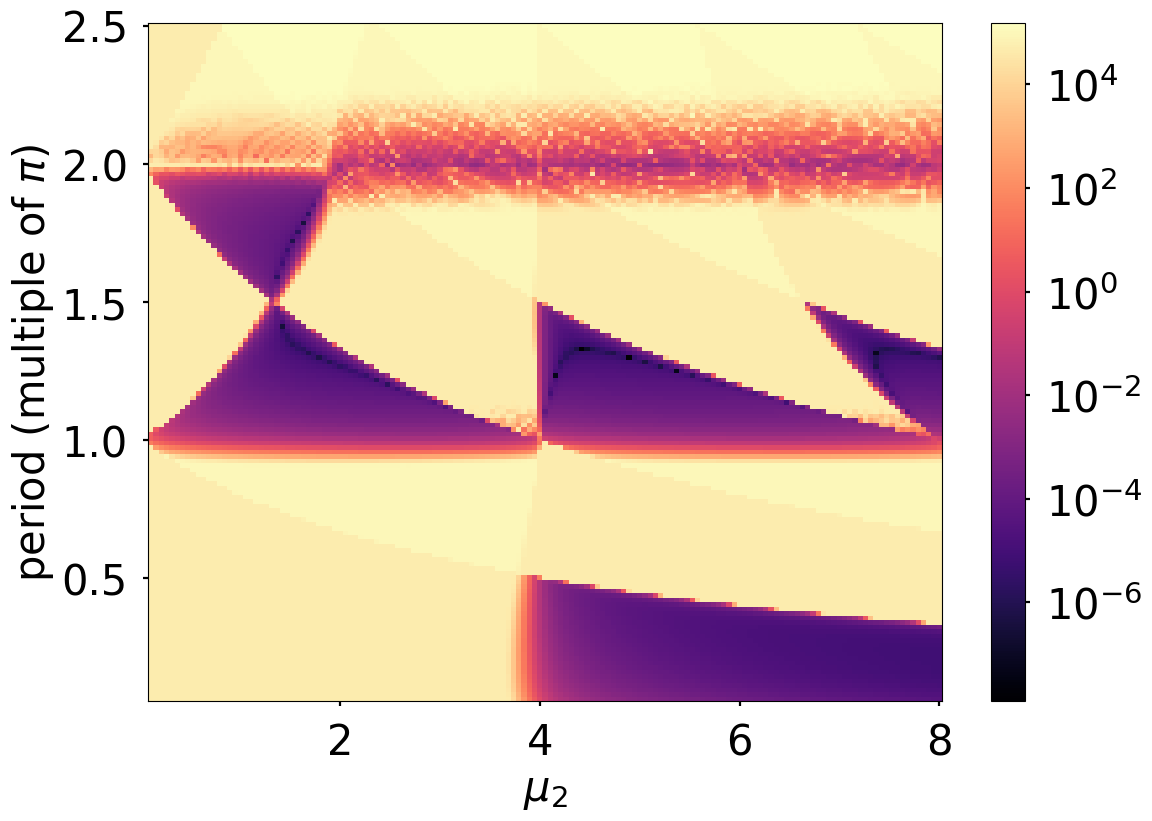

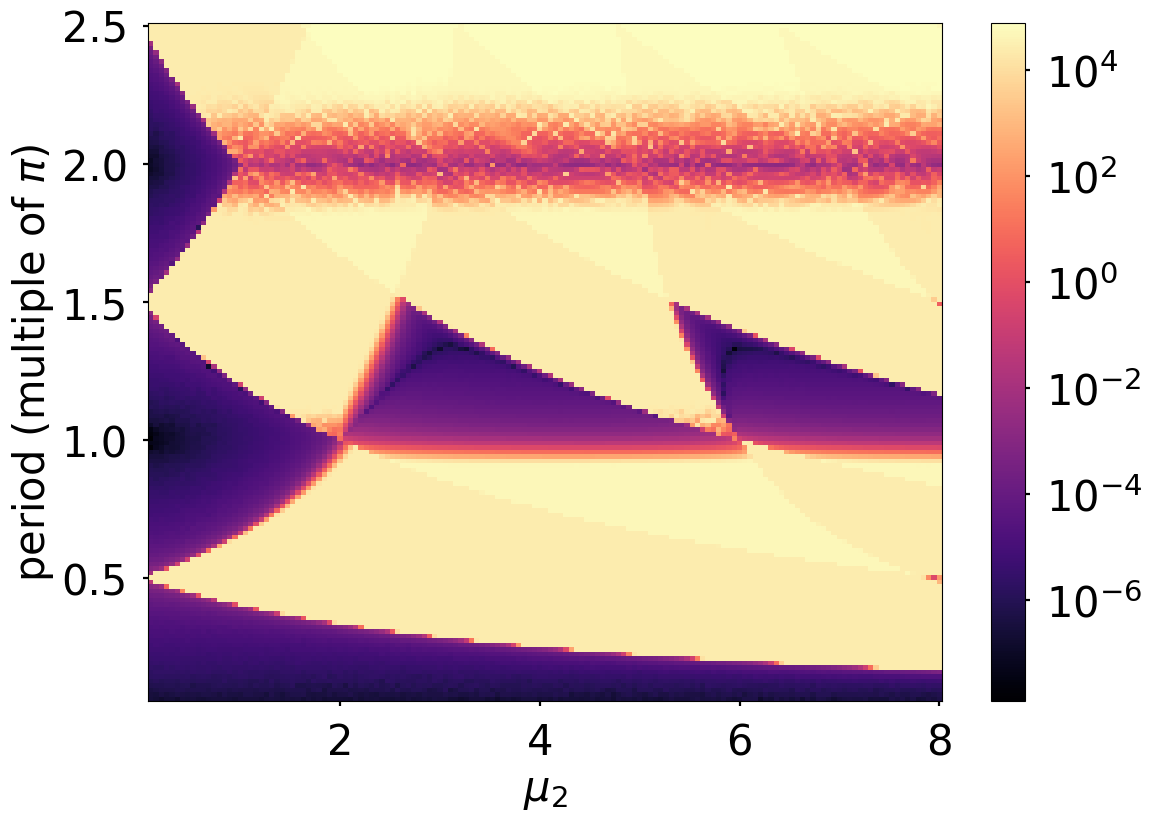

In [42]:
X, Y = np.meshgrid(var_mu, var_T)
Z1pi = np.zeros((len(var_T),len(var_mu)),dtype=complex)
Z2pi = np.zeros((len(var_T),len(var_mu)),dtype=complex)
Z1zero = np.zeros((len(var_T),len(var_mu)),dtype=complex)
Z2zero = np.zeros((len(var_T),len(var_mu)),dtype=complex)
for i in range(len(var_mu)):
    for j in range(len(var_T)):
        Z1pi[j,i] = sum([(fs_bulk_odd_pi1[i][j][n]) for n in range(int(np.ceil(N_global/2)))])
        Z2pi[j,i] = sum([(fs_bulk_odd_pi2[i][j][n]) for n in range(int(np.ceil(N_global/2)))])
        Z1zero[j,i] = sum([(fs_bulk_odd_zero1[i][j][n]) for n in range(int(np.ceil(N_global/2)))])
        Z2zero[j,i] = sum([(fs_bulk_odd_zero2[i][j][n]) for n in range(int(np.ceil(N_global/2)))])

fig, ax = plt.subplots()

# Default norm:
pcm = ax.pcolormesh(X, Y/np.pi, np.abs(((Z1zero).imag)), cmap='magma',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
ax.set_title('')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('period (multiple of $\pi$)')
#plt.savefig(f"odd-w zero energy vs period vs mu2-mu1={mu1}t delta={delta1}t N={N_global},first gauge.pdf",bbox_inches = 'tight')
plt.show()


fig, ax = plt.subplots()
pcm = ax.pcolormesh(X, Y/np.pi, (np.abs((Z1pi).imag)), cmap='magma',norm='log')
fig.colorbar(pcm, ax=ax, orientation='vertical')
ax.set_title('')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('period (multiple of $\pi$)')
#plt.savefig(f"odd-w pi energy vs period vs mu2-mu1={mu1}t delta={delta1}t N={N_global},first gauge.pdf",bbox_inches = 'tight')
plt.show()

In [46]:
windings1 = np.load("windings1_mu2 vs T, mu1=0, small delta = 0.001,k_steps=300.npy")
windings2 = np.load("windings2_mu2 vs T, mu1=0, small delta = 0.001,k_steps=300.npy")
var_mu = np.linspace(0.1,8,251)
var_T = np.linspace(0.2, 2.5*np.pi, 251)
delta2 = 1

/tmp/ipykernel_1984840/4278152064.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  windings2dzero[j,i] = ((windings1+windings2)[i,j]/2)
/tmp/ipykernel_1984840/4278152064.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  windings2dpi[j,i] = ((windings2-windings1)[i,j]/2)


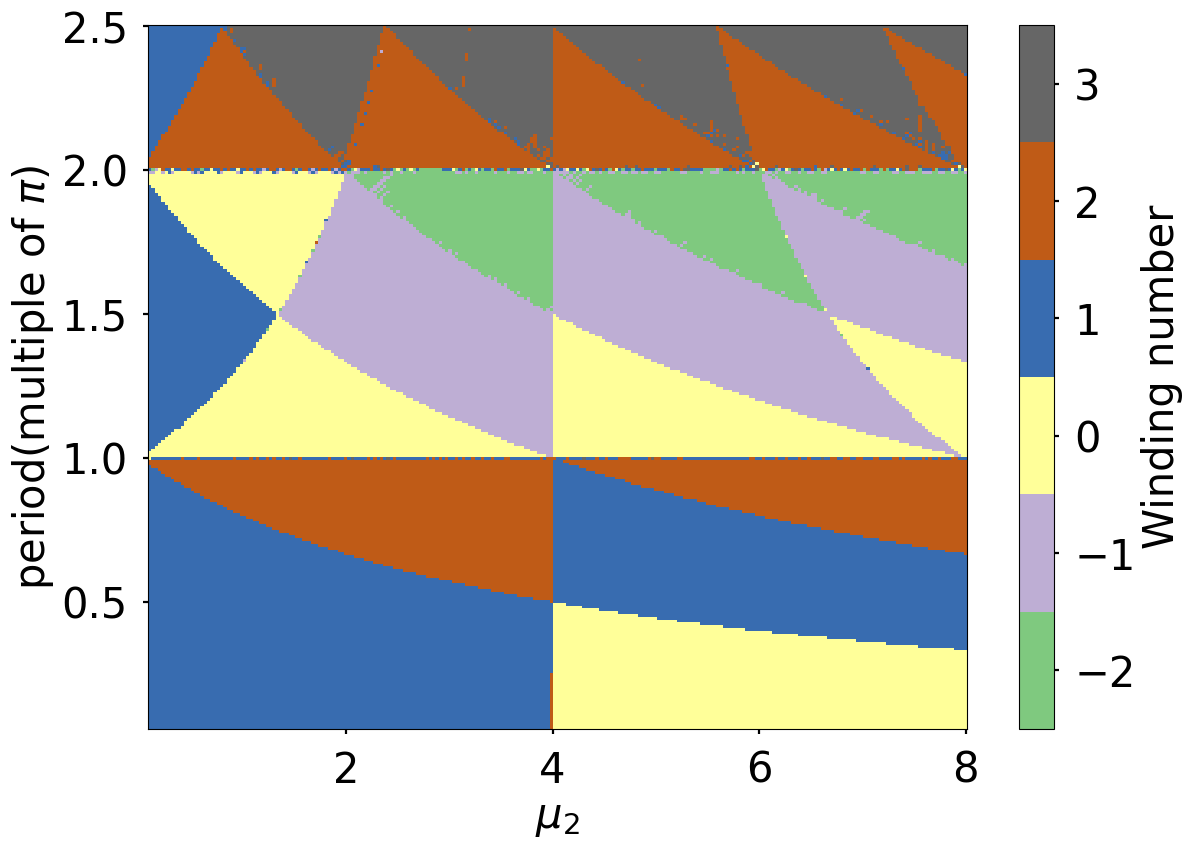

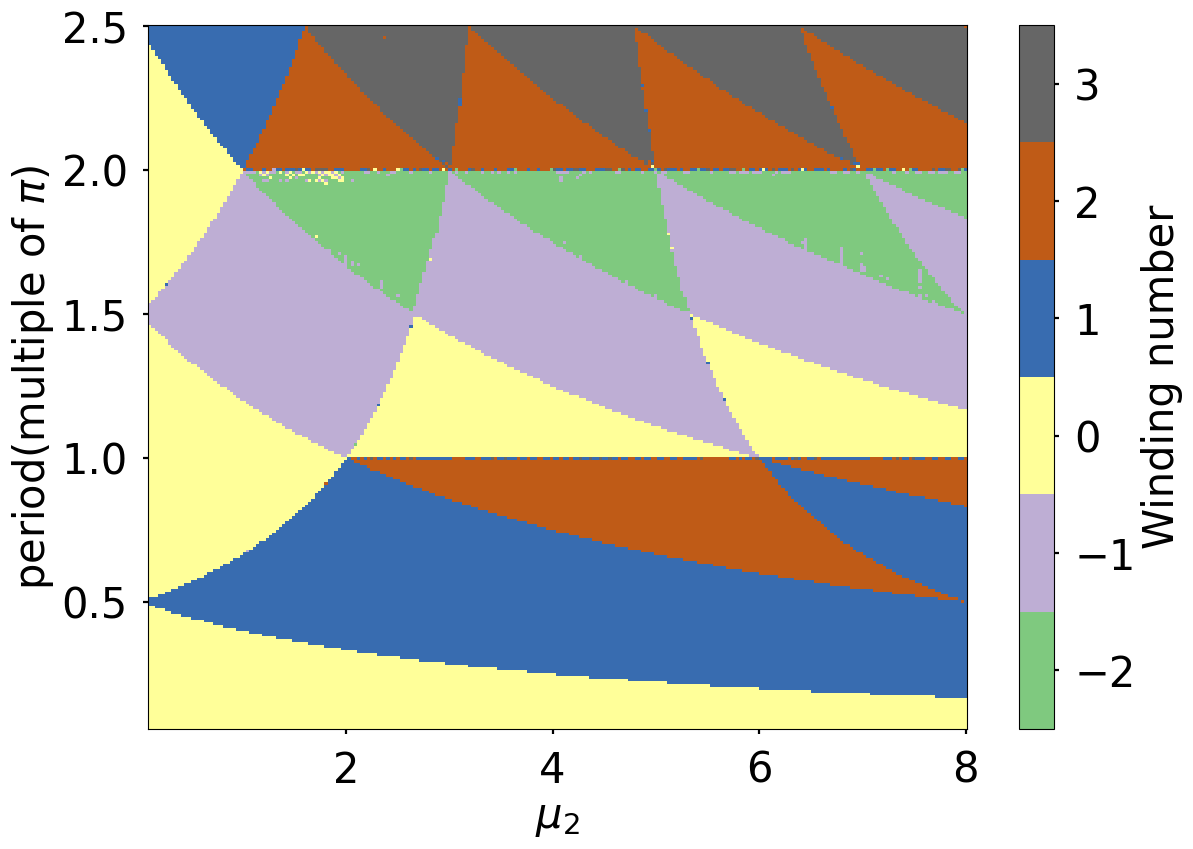

In [53]:
from math import floor, ceil


_n = 8/2
x, y = np.meshgrid(var_mu, var_T)
windings2dzero = np.zeros((len(var_T),len(var_mu)))
windings2dpi = np.zeros((len(var_T),len(var_mu)))
for i in range(len(var_mu)):
    for j in range(len(var_T)):
        windings2dzero[j,i] = ((windings1+windings2)[i,j]/2)
        windings2dpi[j,i] = ((windings2-windings1)[i,j]/2)


        if (windings2dzero[j,i]) > 3 or (windings2dzero[j,i]) < -2:
            windings2dzero[j,i] = floor(windings2dzero[j-1,i-1])
        
        if (windings2dpi[j,i]) > 3 or (windings2dpi[j,i]) < -2:
            windings2dpi[j,i] = floor(windings2dzero[j-1,i-1])






fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
#cmap = mp.cm.get_cmap('Accent',6)
cmap = mp.colormaps['Accent'].resampled(6)
cp = plt.pcolormesh(x, y/np.pi, (np.round((windings2dzero))), cmap=cmap, vmin=-2.5, vmax=3.5)
cbar = plt.colorbar(cp)
cbar.set_label('Winding number')
ax.set_title('')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('period(multiple of $\pi$)')
plt.savefig(f'./graphs/winding number of zero majorana vs mu2, mu1={mu1},delta1={delta1},delta2={delta2}.pdf',bbox_inches = 'tight')
plt.show()



fig = plt.figure()
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.pcolormesh(x, y/np.pi, (np.round((windings2dpi))), cmap=cmap, vmin=-2.5, vmax=3.5)
cbar = plt.colorbar(cp)
cbar.set_label('Winding number')
ax.set_title('')
ax.set_xlabel('$\mu_2$')
ax.set_ylabel('period(multiple of $\pi$)')
plt.savefig(f'./graphs/winding number of pi majorana vs mu2, mu1={mu1},delta1={delta1},delta2={delta2}.pdf',bbox_inches = 'tight')
plt.show()

NameError: name 'xrange' is not defined

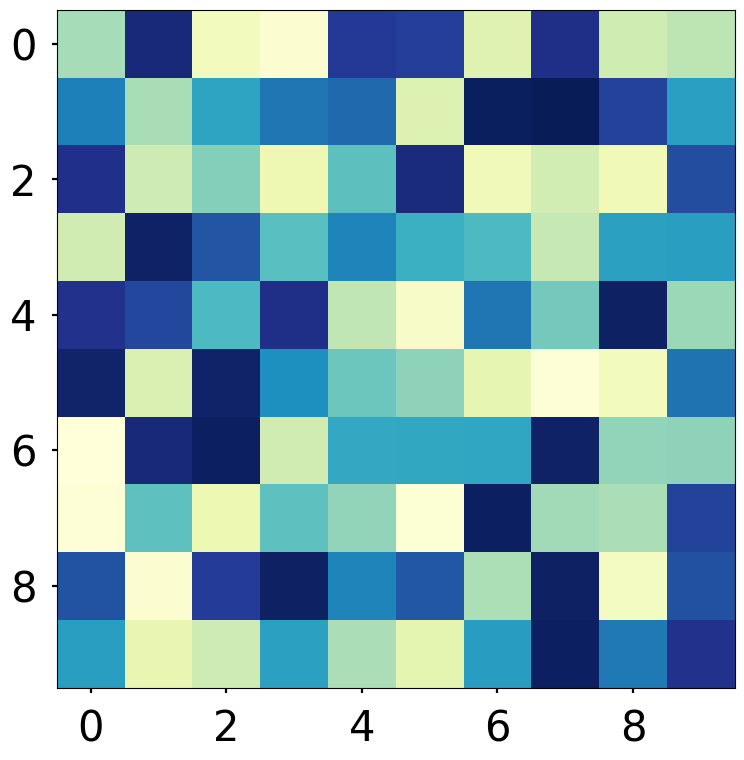